For computer vision, there is a popular kind of Neural Network, known as Convolutional Neural Network (CNN). Two important concepts of CNN:
* Convolution --> Creating a sliding window (m-by-n), called Kernel, that moves through an image (M-by-N) and results in a new "image".

* Max pooling --> We again need a window, but now we are not convolving. We basically get "max" of values enclosd by that window. This process results in a new "image".

In [23]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score

In [2]:
data = tf.keras.datasets.mnist.load_data(path='mnist.npz')
data

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [3]:
data_train = data[0]
data_test = data[1]

In [27]:
X_train = data_train[0] / 255
y_train = data_train[1]

X_test = data_test[0] / 255
y_test = data_test[1]

In [28]:
X_train.shape

(60000, 28, 28)

In [29]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation=tf.nn.relu, input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax),
])

# Exercise:
# Try to understand how these layers are connected. like..what is 32? 
# or, how does MaxPool affect the shape of data...? etc.
# what are the parameters? ALl will be revealed in "math" parts...
# (feel free to search online. But, if you are serious, 
# go and checkout and math notebook)

In [30]:
model.compile(
    optimizer='adam', 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics='accuracy',
)

In [31]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 flatten_3 (Flatten)         (None, 12544)             0         
                                                                 
 dense_6 (Dense)             (None, 128)               1605760   
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                      

In [32]:
model.fit(X_train, y_train)

1875/1875 [==============================] - 50s 27ms/step - loss: 0.1114 - accuracy: 0.9652


In [33]:
y_test_proba = model.predict(X_test)
y_test_pred = np.argmax(y_test_proba, axis=1)

In [34]:
accuracy_score(y_test, y_test_pred)

0.9777

In [35]:
# 90% plus of your work is just about cleaning data! 
# So, it is very important, particularly in real world problems!

Let us plot mislabeled images

In [36]:
mask = y_test != y_test_pred
misclassified_idx = np.flatnonzero(mask)
misclassified_idx

array([  63,   78,  115,  211,  259,  266,  340,  445,  448,  495,  543,
        582,  591,  659,  674,  691,  717,  740,  813,  829,  839,  844,
        882,  924,  965, 1014, 1039, 1178, 1182, 1202, 1226, 1232, 1234,
       1242, 1247, 1260, 1289, 1299, 1319, 1326, 1364, 1393, 1502, 1530,
       1549, 1553, 1562, 1621, 1686, 1709, 1717, 1737, 1754, 1774, 1790,
       1828, 1856, 1878, 1901, 1955, 2009, 2035, 2043, 2053, 2093, 2107,
       2109, 2118, 2129, 2130, 2135, 2182, 2266, 2272, 2369, 2382, 2387,
       2395, 2414, 2447, 2526, 2654, 2742, 2758, 2810, 2896, 2921, 2939,
       2953, 2995, 3023, 3030, 3073, 3130, 3206, 3422, 3503, 3520, 3534,
       3558, 3559, 3662, 3751, 3757, 3767, 3780, 3808, 3853, 3902, 3941,
       3968, 3976, 4063, 4075, 4078, 4140, 4163, 4176, 4207, 4224, 4256,
       4294, 4350, 4360, 4380, 4443, 4497, 4507, 4536, 4571, 4575, 4601,
       4639, 4679, 4731, 4761, 4783, 4807, 4860, 4890, 4956, 4978, 5068,
       5246, 5547, 5676, 5749, 5752, 5888, 5937, 59

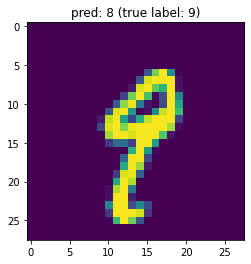

In [37]:
# example
idx = 78
plt.imshow(X_test[idx])
plt.title(f"pred: {y_test_pred[idx]} (true label: {y_test[idx]})")
plt.show()

**What if** the images have different sizes? How should we deal with that?
<br>
**Solution:** Resize all images into the same size :)

So, we can do: <br>

`tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation=tf.nn.relu, input_shape=(150, 150, 3))`

<br>

Then, we can see that we are resizing all images to (150, 150). But, what is that `3` in (150, 150, 3)? That means we are using 3 channels (for RGB). So, the image is not gray scale. Note that in image with 3 channels RGB, our kernel (filter) will be 3D, and the filter in each channel can be different that filter of another channel. However, we can then add the impact of 3 filters (of 3D kernel) on 3 channel and return a single value. So, the result can be 2D image. Now, if I have `n` 3D-kernels...I will get `n` 2D images, and thus my new object has L\*W\*D where L*W is the same as size of 2D image, and D is `n`.

**Let us take a look again at the code:** <br>

`tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation=tf.nn.relu, input_shape=(28, 28, 1))`

This line shows that we have 32 filters and our kernel is 3-by-3. We then use input image of 28\*28\*1, which means our image is 2D (with one channel). Note that the stride, by default (see doc), is (1,1). And `padding` is set `same`. Therefore, according to doc, the output will have the same image size, so 28\*28. However, have 32 filters. So, it would be (28, 28, 32). How about number of neurons? How does NN look like? It will be taken care of shortly in upcoming notebooks.



`tf.keras.layers.MaxPool2D((2, 2), strides=2)` <br>
Note that here we do not have number of filters. Because, in maxpooling, we are change number of channels (depth), but we just sliding window and change the size of each 2D image.

Perform TFDL on Cat-Dog image classification later:
[link](https://learn.udacity.com/courses/ud187/lessons/4a041ac9-3bb9-43d6-8a02-4fa912626028/concepts/610653f2-f9a7-43fa-a8c8-d166eea9c4ce)

**Note:** For binary classification, our last layer can be:
* 2 nodes, with `softmax` as activation function
* 1 node, with `sigmoid` as activation function, loss='binary_crossentropy'

**Overfitting:**
In overfitting, the model is not fitted too well (too much) on a train data as if it memorizes them rather than learning the general behavior. Therefore, we need a way to resolve this overfitting challenge. One way is to apply it on validation set and then choose the model that results in low error in validation test. We may perform cross-validation. 

Note that, even in this case, we may end up being biased towards our validation test. So, we need a test set that we do not touch, and then finally just evaluate the performance of chosen model on new, completely unseen data.

Two important approaches for dealing with overfitting challenge are:
* Data Augmentation -> creating differenet versions of image (like flipping, rotation, etc) to help model genralize better
* Drop out -> randomly remove some of neurons to help others get chance to train better and get generalized better.

**Exercise:** <br>
After performing simple TFDL on  cat-dog data, you can try to consider `Data Augmentation` (in preprocessing) and/or `Drop out`(throughout learning process) to see the result!

Another way to avoid overfitting is early stopping... It means we stop the learning process at early stages to let model not be overfitted to the data.

**Exercise:** <br>
Use CNN to classify any other dataset of images.

**Suggestion:** Before the exercises, you may want to take a look at the next few notebooks where I talk about details of NN, and explain more about the model and the tf inputs. We can then come back here to do exercises and move forward.